In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels
import common_grid_search_analysis
import TrainingCurves

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

PLOT_PREFIX = "Figures/FACES_NN_PLOT_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_NN_DATA"

In [2]:
import NeuralNetworks.common_NN as common_NN
X_train, X_test, y_train, y_test, y_test_non_noisy = get_noisy_nonlinear_with_non_noisy_labels()
num_features = X_train.shape[1]

In [3]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(MLPClassifier(), X_train, y_train, "accuracy")

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

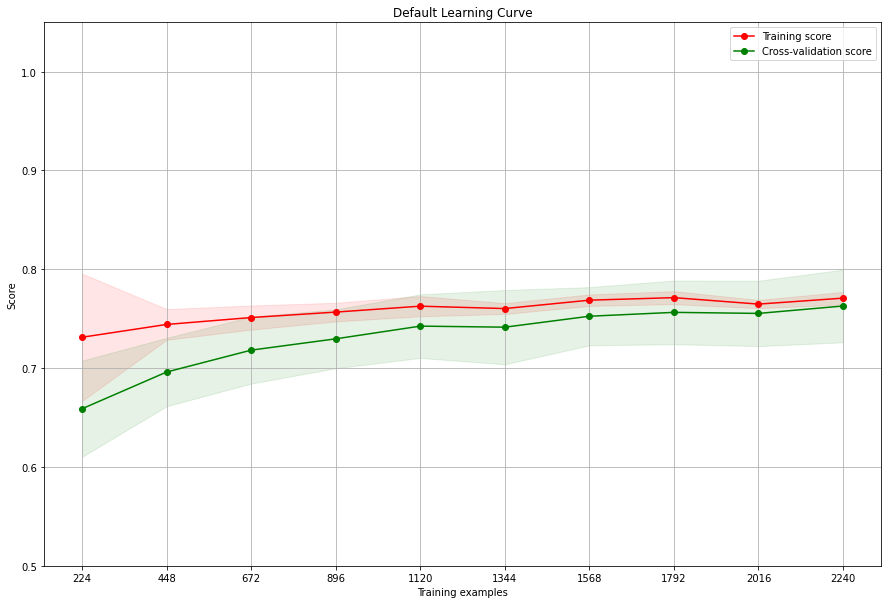

In [4]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [7]:
learning_rate_init=[i for i in np.arange(0.0005, 0.08, 0.0005)]

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(MLPClassifier(batch_size=64), X_train, y_train, "learning_rate_init", learning_rate_init, 'accuracy', cv=TrainingCurves.get_cv())


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1590 out of 1590 | elapsed:  7.0min finished


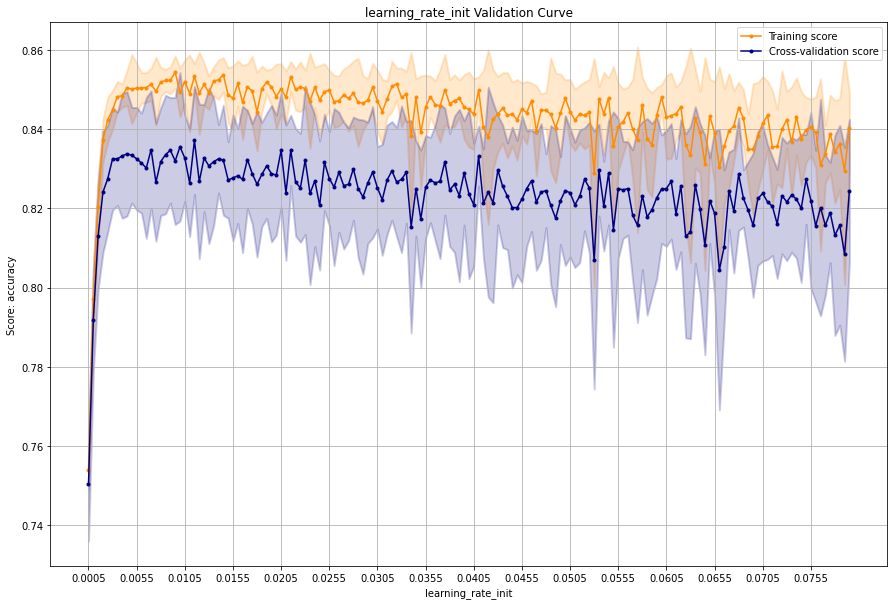

In [9]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "learning_rate_init", learning_rate_init, title="learning_rate_init Validation Curve", scoring="accuracy", tick_spacing=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 500 | elapsed:   21.4s remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  93 out of 500 | elapsed:   48.4s remaining:  3.5min
[Parallel(n_jobs=-1)]: Done 144 out of 500 | elapsed:  1.2min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done 195 out of 500 | elapsed:  1.6min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done 246 out of 500 | elapsed:  2.0min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done 297 out of 500 | elapsed:  2.4min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done 348 out of 500 | elapsed:  2.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done 399 out of 500 | elapsed:  3.2min remaining:   48.4s
[Parallel(n_jobs=-1)]: Done 450 out of 500 | elapsed:  3.6min remaining:   24.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.0min finished


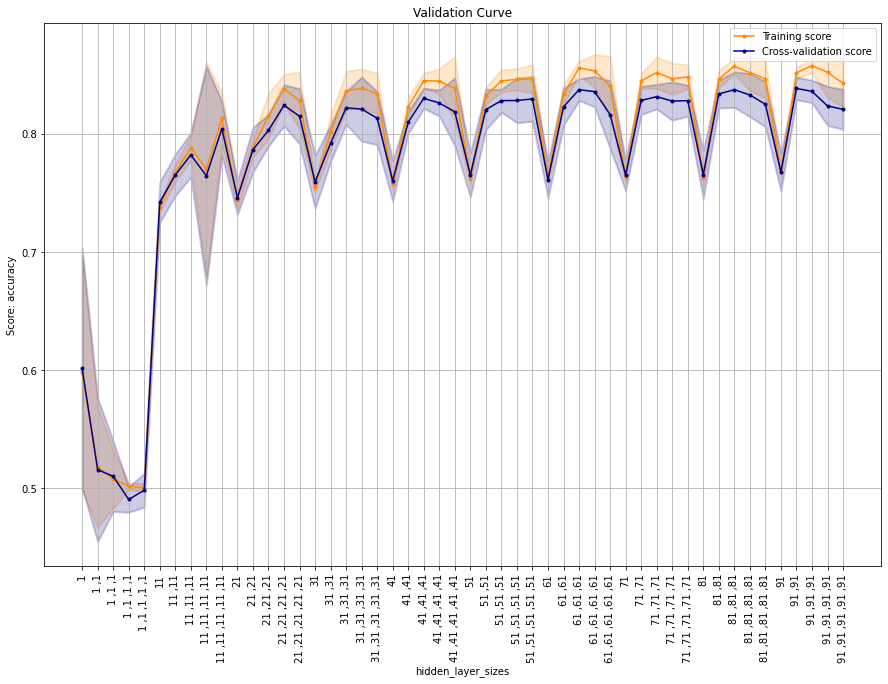

In [5]:
import pickle

num_nodes_per_layer = [i for i in range(1, 101, 10)]
num_hidden_layers = [i for i in range(1, 6, 1)]

hidden_layer_sizes = []
for num_layers in num_hidden_layers:
    for num_nodes in num_nodes_per_layer:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)


if(os.path.isfile('temp_NN_val_scores_NNL.pickle')):
    with open('temp_NN_val_scores_NNL.pickle', 'rb') as handle:
        train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = pickle.load(handle)
else:
    train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'accuracy', cv=TrainingCurves.get_cv())
    with open('temp_NN_val_scores_NNL.pickle', 'wb') as handle:
        pickle.dump((train_scores_mean, train_scores_std, test_scores_mean, test_scores_std), handle, protocol=pickle.HIGHEST_PROTOCOL)

TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title="Validation Curve", scoring="accuracy", tick_spacing=1, rotation='vertical')

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 1520 out of 1520 | elapsed: 60.7min finished


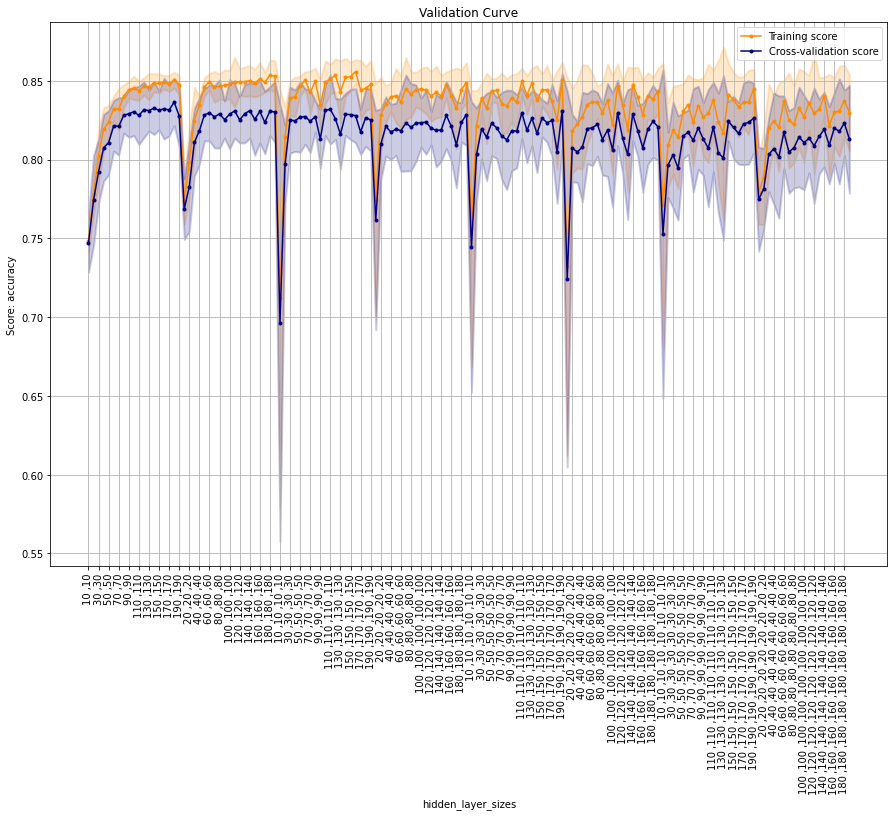

In [5]:
import pickle

num_nodes_per_layer = [i for i in range(10, 300, 10)]
num_hidden_layers = [i for i in range(1, 6, 1)]

hidden_layer_sizes = []
for num_layers in num_hidden_layers:
    for num_nodes in num_nodes_per_layer:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)


if(os.path.isfile('temp_NN_val_scores_NNL_2.pickle')):
    with open('temp_NN_val_scores_NNL_2.pickle', 'rb') as handle:
        train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = pickle.load(handle)
else:
    train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'accuracy', cv=TrainingCurves.get_cv(), n_jobs=3, verbose=1)
    with open('temp_NN_val_scores_NNL_2.pickle', 'wb') as handle:
        pickle.dump((train_scores_mean, train_scores_std, test_scores_mean, test_scores_std), handle, protocol=pickle.HIGHEST_PROTOCOL)

TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title="Validation Curve", scoring="accuracy", tick_spacing=2, rotation='vertical')

In [3]:
num_nodes_per_layer = [i for i in range(10, 150, 10)]
num_hidden_layers = [i for i in range(1, 4, 1)]

hidden_layer_sizes = []
for num_layers in num_hidden_layers:
    for num_nodes in num_nodes_per_layer:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)
    
learning_rate_init=[i for i in np.arange(0.001, 0.04, 0.001)]
learning_rate_init=[i for i in np.arange(0.0005, 0.02, 0.0005)]

max_iter=[i for i in range(200, 800, 100)]
batch_size=[i for i in range(16, 512, 16)]

parameters = {'learning_rate_init': learning_rate_init, 'hidden_layer_sizes': hidden_layer_sizes}

base_parameters={'batch_size': 64, 'max_iter':300}
gs = common_NN.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX, default_parameters=base_parameters, n_jobs=2)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/FACES_NN_DATA_learning_rate_init_0.0005-0.0195_hidden_layer_sizes_[10]-[140, 140, 140].pickle
Fitting 5 folds for each of 1638 candidates, totalling 8190 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    6.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   14.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   19.9s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   30.5s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   39.5s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   52.5s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  2.7min
[Parallel(

Saved  Analysis_Data/FACES_NN_DATA_learning_rate_init_0.0005-0.0195_hidden_layer_sizes_[10]-[140, 140, 140].pickle


/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/SupervisedLearning_Project_Code/common_grid_search_analysis.py:211: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array(np.array(param_values[plot_param])[mask])


Plot saved as:  Figures/FACES_NN_PLOT_GS_ModelComplexity_hidden_layer_sizes_learning_rate_init.png


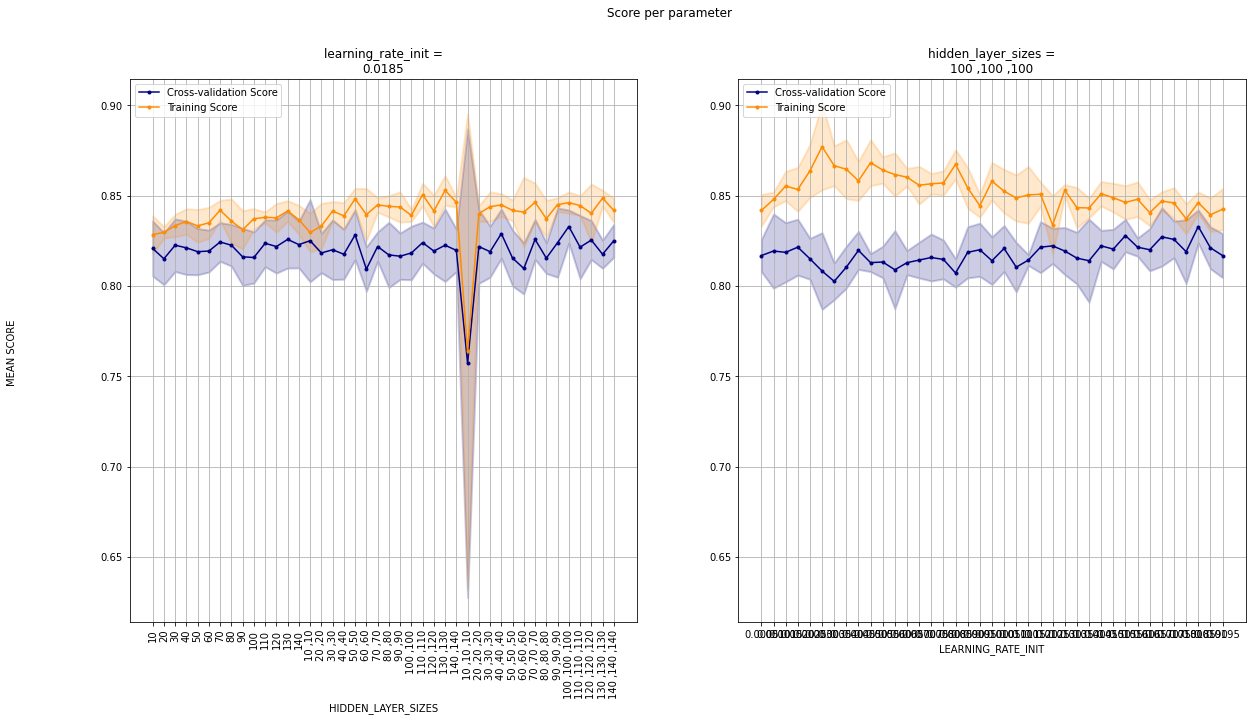

In [4]:
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/SupervisedLearning_Project_Code/common_grid_search_analysis.py:319: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array(np.array(param_values[plot_param])[mask])


Plot saved as:  Figures/FACES_NN_PLOT_GS_Times_hidden_layer_sizes_learning_rate_init.png


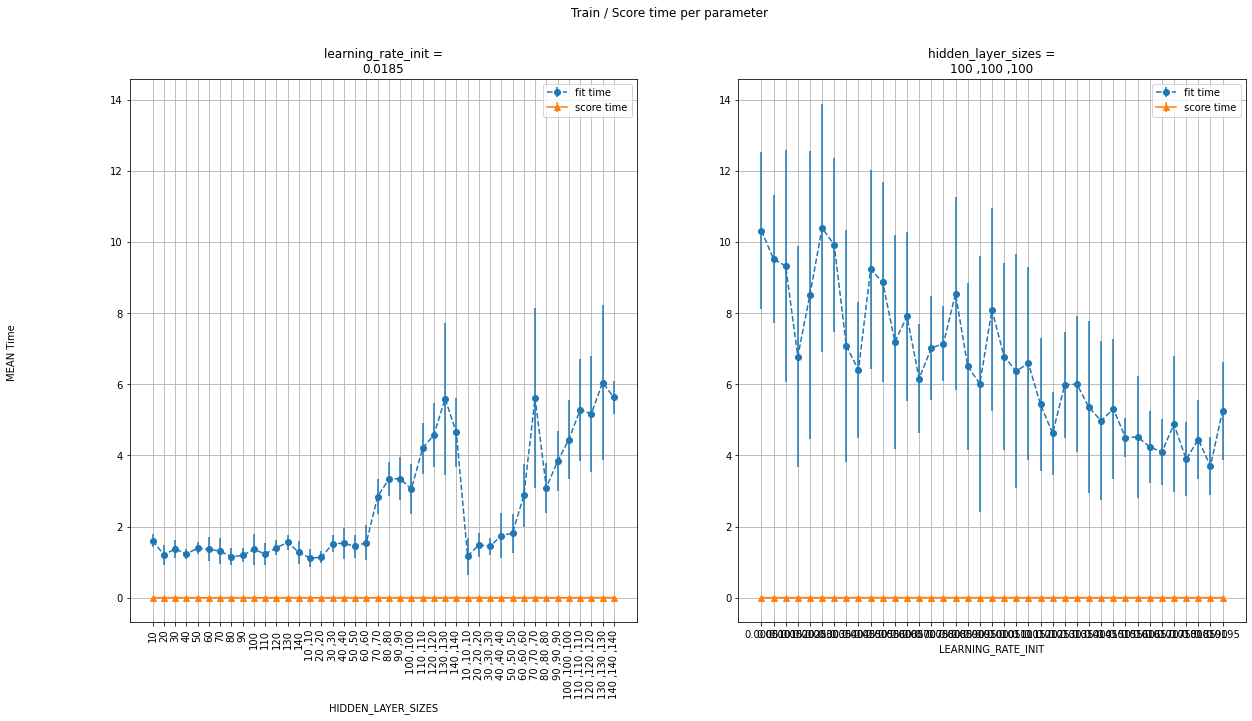

In [5]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

In [6]:
mean_score_limit=0.55
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'learning_rate_init', 'hidden_layer_sizes', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/SupervisedLearning_Project_Code/common_grid_search_analysis.py:395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scores = scores_mean[mask & np.array(np.array(parameter_2_values) == i)]
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/nu

IndexError: index 0 is out of bounds for axis 0 with size 0